In [ ]:
#!pip install statsmodels
#!pip install catboost
#!pip install imblearn
#!pip install xgboost

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import os
import phik
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,LabelEncoder,MaxAbsScaler,RobustScaler
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SMOTE,SVMSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from math import ceil
from numpy.random import RandomState
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [3]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()

In [4]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()

In [5]:
def heatmap_phik(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Phik Correlation Matrix')
    plt.show()
    

In [6]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [7]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [8]:
def metrics(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the classification report and the confusion matrix of the train and validation dataset
    """
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    

In [9]:
def micro_f1_score(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the micro f1 score of the train and validation dataset
    """
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_train, pred_train, average='micro'))

    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_val, pred_val, average='micro'))
    return f1_score(y_val, pred_val, average='micro')

In [10]:
def best_scale(model,X_train,y_train,X_test,y_test):
    """
    Function that returns a table with the micro f1 score for the different scaler
    """
    standard=StandardScaler().fit(X_train).transform(X_train)
    standardTest=StandardScaler().fit(X_test).transform(X_test)

    minMax=MinMaxScaler().fit(X_train).transform(X_train)
    minMaxTest=MinMaxScaler().fit(X_test).transform(X_test)

    maxAbs=MaxAbsScaler().fit(X_train).transform(X_train)
    maxAbsTest=MaxAbsScaler().fit(X_test).transform(X_test)
        
    robust=RobustScaler().fit(X_train).transform(X_train)
    robustTest=RobustScaler().fit(X_test).transform(X_test)

    sclares=[standard,minMax,maxAbs,robust,X_train]
    sclaresTest=[standardTest,minMaxTest,maxAbsTest,robustTest,X_test]
    
    f_score=[]
    
    for i in range(len(sclares)):
        model.fit(sclares[i],y_train)
        y_pred=model.predict(sclaresTest[i])
        f_score.append(f1_score(y_pred,y_test,average="micro"))
        

    return pd.DataFrame(f_score,index=["Standard","MinMax","MaxAbs","Robust","No Scaler"], columns=["F1 Score"])
    

In [11]:
def roc_curve_plot(model,X_train,X_test,y_test,y_train):
    """
    Function that plots the roc curve for a given model
    """
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train))
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr_train, tpr_train,label="ROC Curve train")
    plt.plot(fpr_test, tpr_test,label="ROC Curve test")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

In [12]:
original = pd.read_csv("H2.csv")
original.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [13]:
df=original.copy()

In [14]:
df.shape

(79330, 31)

In [15]:
df.replace('       NULL','Individual', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [17]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [18]:
df.isna().sum()/len(df)*100

IsCanceled                     0.000000
LeadTime                       0.000000
ArrivalDateYear                0.000000
ArrivalDateMonth               0.000000
ArrivalDateWeekNumber          0.000000
ArrivalDateDayOfMonth          0.000000
StaysInWeekendNights           0.000000
StaysInWeekNights              0.000000
Adults                         0.000000
Children                       0.005042
Babies                         0.000000
Meal                           0.000000
Country                        0.030253
MarketSegment                  0.000000
DistributionChannel            0.000000
IsRepeatedGuest                0.000000
PreviousCancellations          0.000000
PreviousBookingsNotCanceled    0.000000
ReservedRoomType               0.000000
AssignedRoomType               0.000000
BookingChanges                 0.000000
DepositType                    0.000000
Agent                          0.000000
Company                        0.000000
DaysInWaitingList              0.000000


In [19]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,Individual,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,Individual,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,Individual,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,Individual,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,Individual,0,Transient,76.5,0,1,Canceled,2015-04-02


In [20]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [21]:
#Tem demasiadas variaveis categoricas
df.drop(['DepositType'],axis=1,inplace=True)

In [22]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [23]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>6 - Data Visualization and Feature Engineering for Numerical Features</font> <a class="anchor" id="sixth-bullet"></a>
    
</div>

### Cancelation ratio per year

In [24]:
year_df=df.loc[:,['ArrivalDateYear','IsCanceled']]

In [25]:
df_year = df.groupby(['ArrivalDateYear', 'IsCanceled']).size().reset_index()
df_year['percentage'] = df.groupby(['ArrivalDateYear', 'IsCanceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_year.columns = ['ArrivalDateYear', 'IsCanceled', 'Counts', 'Percentage']
year_fig = px.bar(df_year, x='ArrivalDateYear', y=['Counts'], color='IsCanceled', text=df_year['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [26]:
year_fig.update_traces(marker_color=['grey','darkred']*3)
year_fig.write_html('year_fig.html')

### Cancelation Ratio % by Month and Year

In [ ]:
df["Arrival Year and Month"] = df.ArrivalDateYear.astype(str) + " " + df.ArrivalDateMonth.astype(str)

In [ ]:
ordered_months = ["2015 July", "2015 August", "2015 September", "2015 October", "2015 November", "2015 December"
        ,"2016 January", "2016 February", "2016 March", "2016 April", "2016 May", "2016 June", 
          "2016 July", "2016 August", "2016 September", "2016 October", "2016 November", "2016 December",
            "2017 January", "2017 February", "2017 March", "2017 April", "2017 May", "2017 June", 
          "2017 July", "2017 August"]
df["Arrival Year and Month"]= pd.Categorical(df["Arrival Year and Month"], categories=ordered_months, ordered=True)

In [ ]:
df_year_month = df.groupby(['Arrival Year and Month', 'IsCanceled']).size().reset_index()
df_year_month['Percentage'] = df.groupby(['Arrival Year and Month', 'IsCanceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_year_month.columns = ['Arrival Year and Month', 'IsCanceled', 'Counts', 'Percentage']
year_month_fig = px.bar(df_year_month, x='Arrival Year and Month', y=['Counts'], color='IsCanceled', text=df_year_month['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [ ]:
year_month_fig.update_traces(marker_color=['grey','darkred']*26)
year_month_fig.write_html('year_month_fig.html')

### Home  Country of Guests

In [ ]:
df.columns

In [ ]:
country_df = pd.DataFrame(df.loc[df["IsCanceled"] == 0]["Country"].value_counts())
country_df.rename(columns={"Country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df["Guests in %"] = round(country_df["Number of Guests"] / total_guests * 100, 2)
country_df["Country"] = country_df.index
country_df.loc[country_df["Guests in %"] < 2, "country"] = "Other"

# pie plot
country_fig = px.pie(country_df,
             values="Number of Guests",
             names="Country",
             title="Home country of guests",
             template="seaborn")

country_fig.update_traces(textposition="inside", textinfo="value+percent+label")
country_fig.write_html('country_fig.html')

### Lead Time vs ADR by Booking Status

In [ ]:
df.columns

In [ ]:
x = df['LeadTime']
y = df['ADR']
color = df['IsCanceled']

data = dict(type='scatter',
            x=x, 
            y=y,  
            mode='markers',
            marker=dict(
                        color=color,
                        colorbar=dict(title=dict(text='Canceled')),
                        colorscale='Viridis',
                        showscale=True,
                        line=dict(
                                  color='black',
                                  colorscale='inferno' #Not in use here since our line color is fixed!
                                )
                       ),
            hovertemplate="LeadTime: <b>%{x}</b> <br><br>" + 
                        "ADR: %{y} <br>" +
                        "Canceled: %{color} <br>" 
                       
            
            ,
            name='Scatter Visualization',
            showlegend=False
           )



layout = dict(title=dict(text='Lead Time vs ADR by Booking Status'),
              yaxis=dict(title='ADR'),
              xaxis=dict(title='LeadTime')
             )


fig_lead_adr = go.Figure(data=data, layout=layout)

fig_lead_adr.write_html('fig_lead_adr.html')

### Lead Time By Cancelations 

In [ ]:
fig_lead_cancel = sns.FacetGrid(df, hue = 'IsCanceled',
                                 height = 6,

                                 xlim = (0,600)
                                 ).map(sns.kdeplot, 'LeadTime', shade = True).add_legend()
plt.show()

### ADR market segments per room type

In [ ]:
# show figure:
plt.figure(figsize=(12,8))
sns.barplot(x="MarketSegment",y="ADR",hue="ReservedRoomType",data=df,ci=0,errwidth=1,capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

### Number of Nights

In [ ]:
df.columns

In [ ]:
df["total_nights"] = df["StaysInWeekendNights"] + df["StaysInWeekNights"]
num_nights= list(df["total_nights"].value_counts().index)
num_bookings = list(df["total_nights"].value_counts())
rel_bookings = df["total_nights"].value_counts() / sum(num_bookings) * 100 # convert to percent
res_nights = pd.DataFrame({"num_nights": num_nights,"rel_num_bookings": rel_bookings}).reset_index(drop=True)

In [ ]:
sns.lineplot(data=res_nights, x="num_nights", y="rel_num_bookings")

In [ ]:
# total bookings per market segment (incl. canceled)
segments=df["MarketSegment"].value_counts()
# pie plot
MS_fig = px.pie(segments,values=segments.values,names=segments.index,title="Bookings per market segment",template="seaborn")
MS_fig.update_traces(rotation=-90, textinfo="percent+label")
MS_fig.show()


# Correlation 

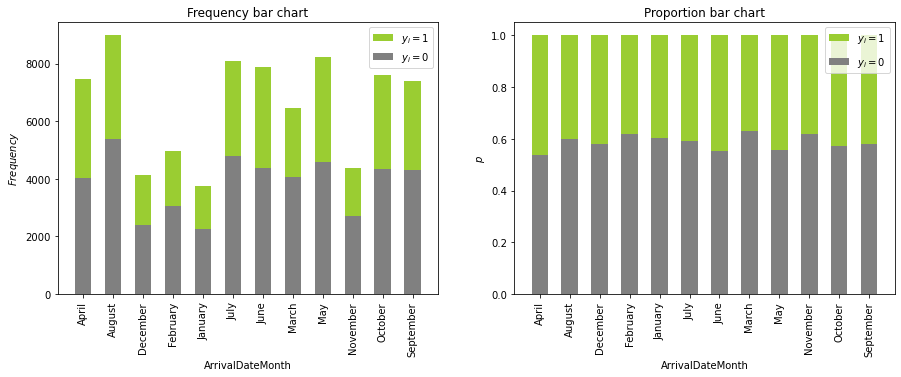

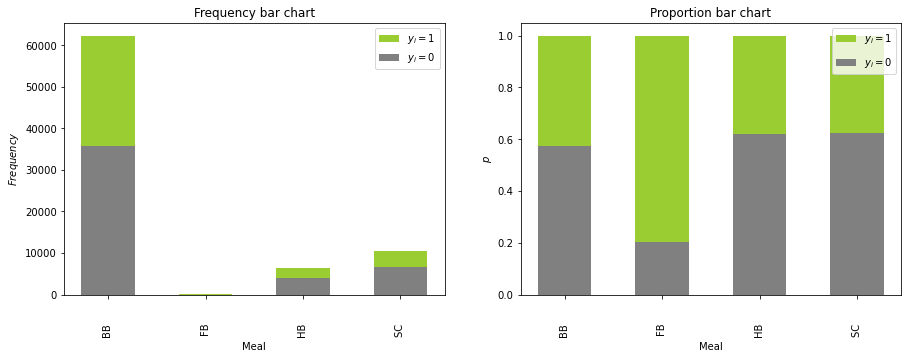

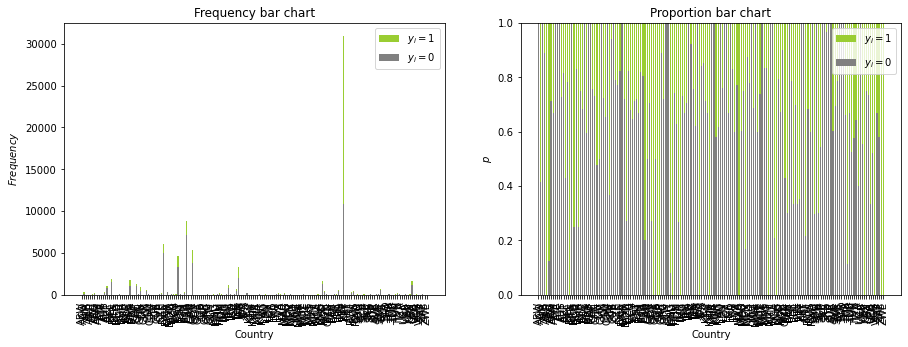

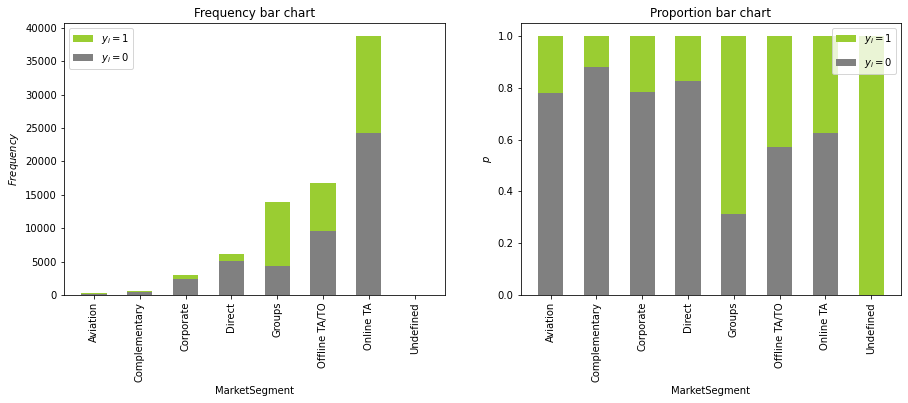

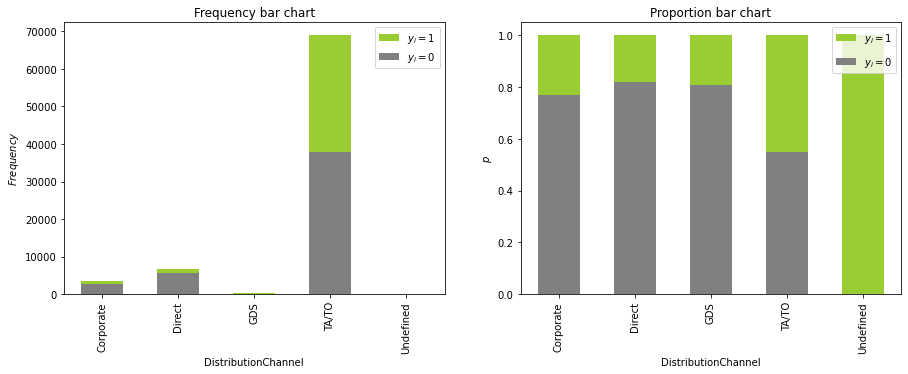

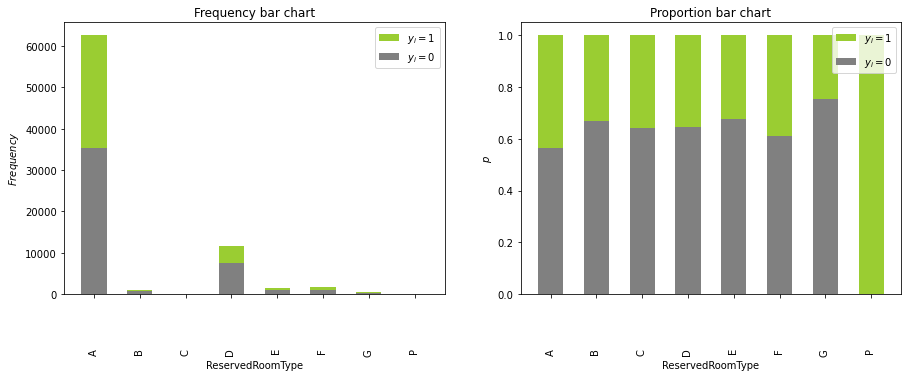

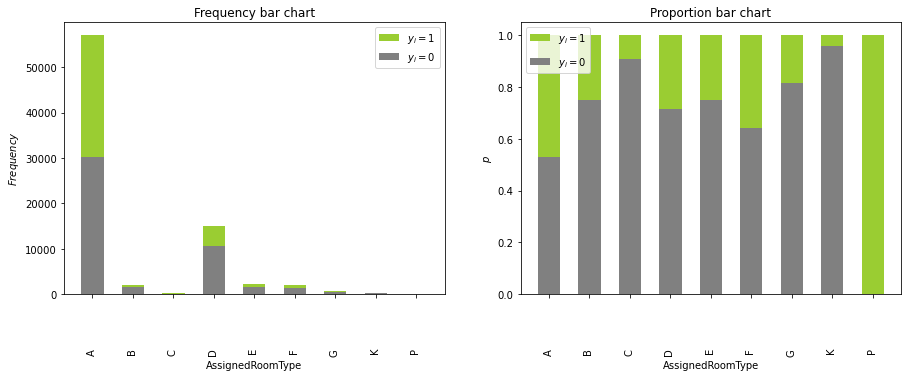

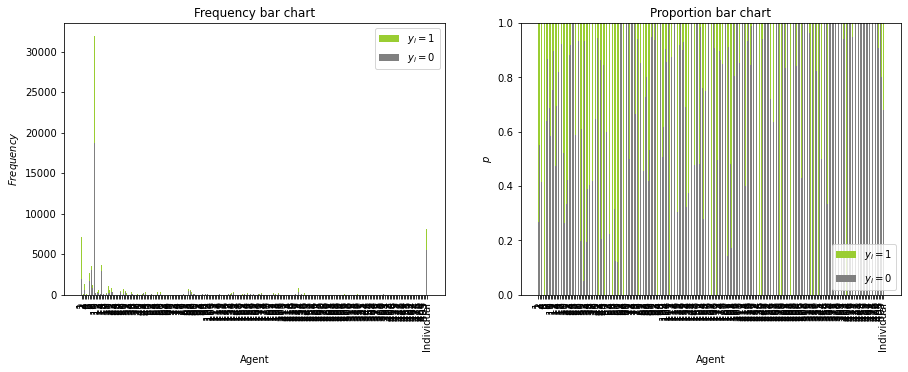

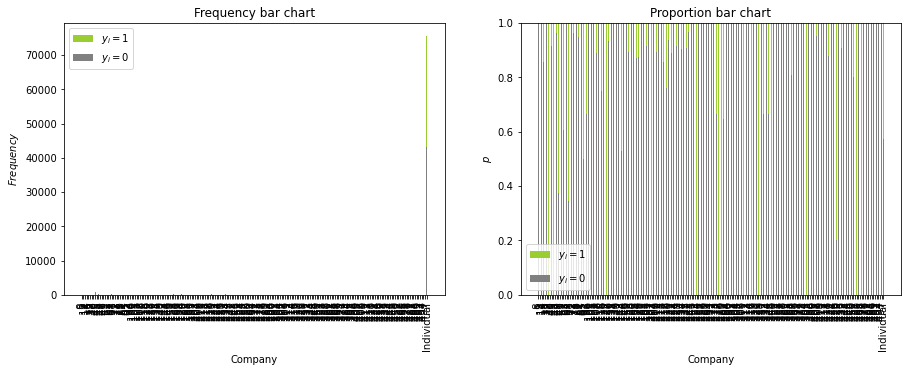

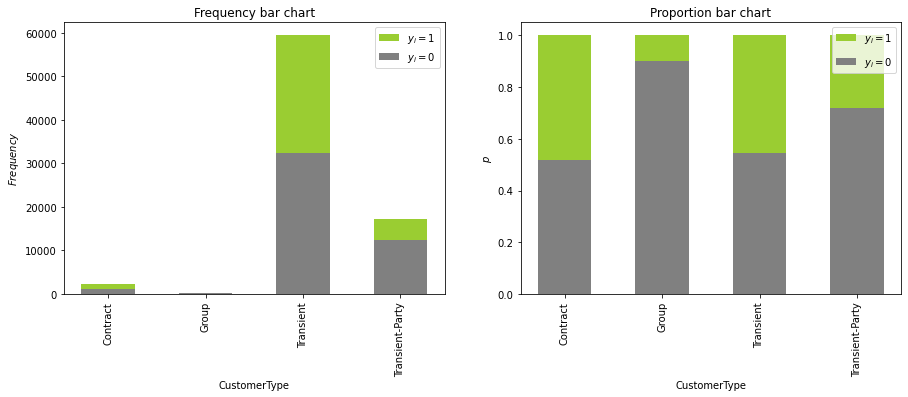

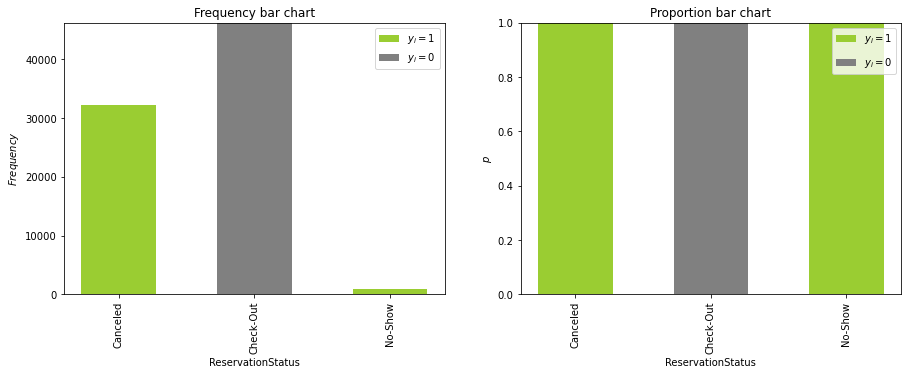

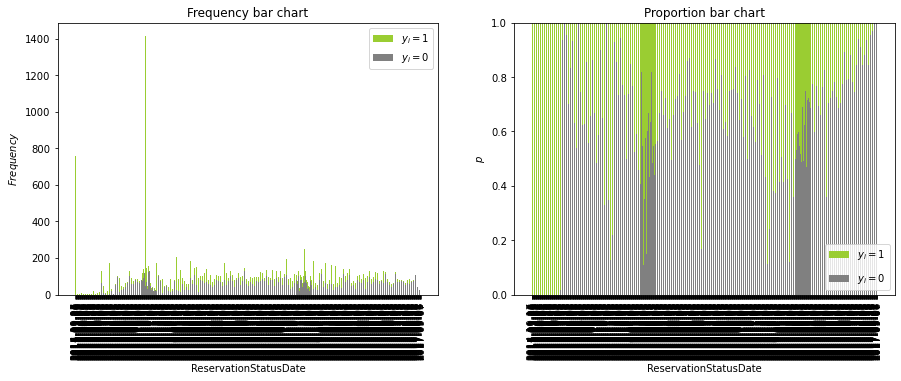

In [24]:
for i in categorical:   
    bar_charts_categorical(df, i, "IsCanceled")

In [27]:
#Demasiadas categorias 
df.drop(['Country','Agent','Company','ReservationStatusDate'],inplace=True,axis=1)

In [28]:
#100% correlacionado com o target
df.drop('ReservationStatus',axis=1,inplace=True)

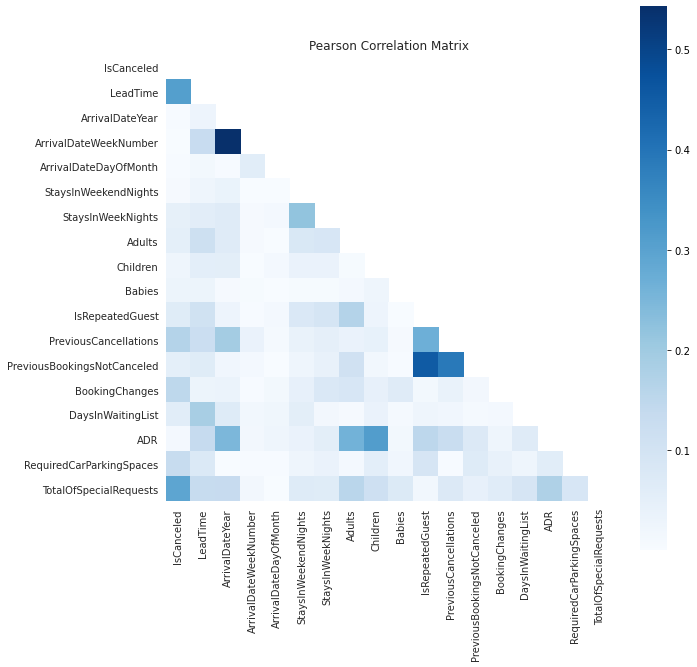

In [29]:
heatmap_pearson(df.corr(method='pearson').abs())

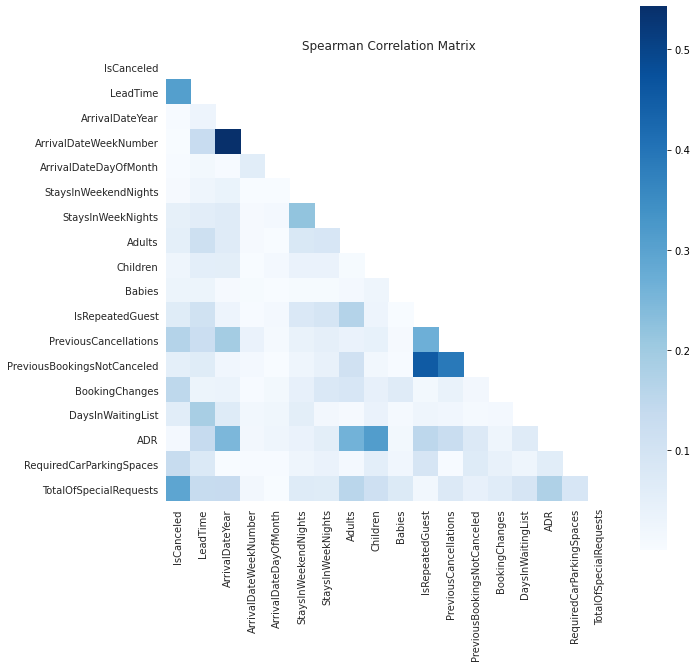

In [30]:
heatmap_spearman(df.corr(method='pearson').abs())

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']


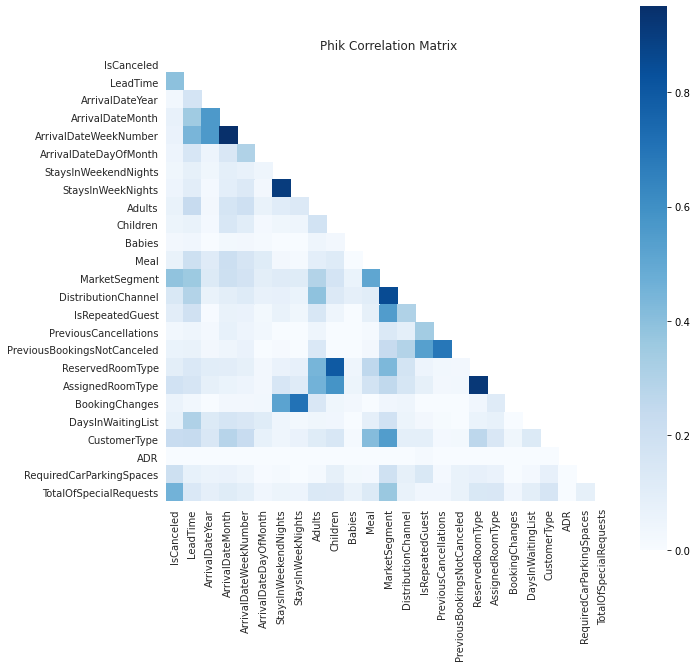

In [31]:
heatmap_phik(df.phik_matrix().abs())

<div class="alert alert-block alert-info">

### Data Imputation
    
</div>

In [29]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64

In [30]:
imputer = KNNImputer(n_neighbors=4)
metric_features = df.columns.to_list()
df[numerical] = imputer.fit_transform(df[numerical])

In [31]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64

## Outliers

#### Isolation Forest

In [32]:
data_central = df.copy()

In [33]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[numerical])

In [34]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [35]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.001 %


#### Minimum Covariance Determinant

In [36]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(data_central[numerical])

In [37]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [38]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.883 %


In [39]:
df = data_central.copy()

#### PCA Visualization of outliers

In [ ]:
df_pca = df.copy()

In [ ]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat  # What is this output?

In [ ]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

In [ ]:
outliers = list(outliers_mcd.index.tolist() + outliers_if.index.tolist())

def is_out(x):
    if x in outliers:
        return 'Outlier'
    else:
        return 'Not Outlier'

pca_df['OUTLIER'] = pca_df.reset_index().iloc[:,0].apply(is_out)

In [ ]:
pca_df.describe(include='all')

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue='OUTLIER')
plt.xlabel('Dim 1 (82.9%)')
plt.ylabel('Dim 2 (12.5%)')

In [755]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Catboost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

### Separating X and Y

In [40]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [42]:
cat = CatBoostClassifier(iterations=100,cat_features=categorical,verbose=100)
cat.fit(X_train,y_train)

Learning rate set to 0.494524
0:	learn: 0.5443312	total: 178ms	remaining: 17.6s
99:	learn: 0.3218206	total: 4.33s	remaining: 0us


### Feature Selection

In [43]:
importances = cat.feature_importances_
indices = np.argsort(importances)

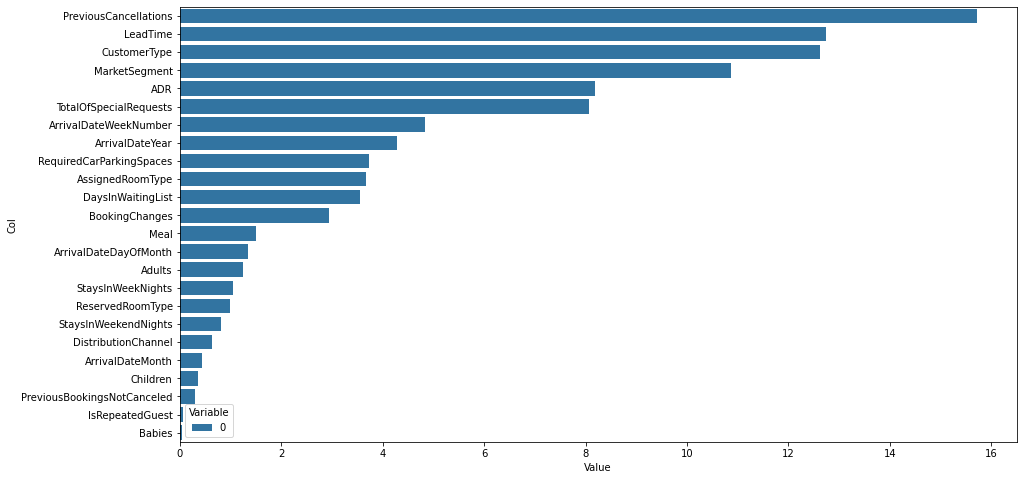

In [44]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [89]:
X_cat=X[zippy.sort_values(by=0,ascending=False).head(20)['col']]

### Data Split after feature selection

In [90]:
categorical=X_cat.select_dtypes(include="object").columns.to_list()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [100]:
cat = CatBoostClassifier(iterations=1000,cat_features=categorical,verbose=1000,random_state=70)
cat.fit(X_train,y_train)

Learning rate set to 0.059867
0:	learn: 0.6595439	total: 72.4ms	remaining: 1m 12s
999:	learn: 0.3096919	total: 1m 13s	remaining: 0us


In [101]:
y_train_pred= cat.predict(X_train)
y_test_pred=cat.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     35523
           1       0.88      0.78      0.83     26111

    accuracy                           0.86     61634
   macro avg       0.87      0.85      0.86     61634
weighted avg       0.86      0.86      0.86     61634

[[32732  2791]
 [ 5635 20476]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [102]:
cv_results = cross_validate(cat, X_train,y_train, cv=5, scoring=["accuracy"])
cat_cross_train=cv_results["test_accuracy"].mean()
cat_cross_train

Learning rate set to 0.054426
0:	learn: 0.6630441	total: 67.9ms	remaining: 1m 7s
999:	learn: 0.3117962	total: 1m 3s	remaining: 0us
Learning rate set to 0.054426
0:	learn: 0.6632748	total: 69ms	remaining: 1m 8s
999:	learn: 0.3117557	total: 1m 3s	remaining: 0us
Learning rate set to 0.054426
0:	learn: 0.6634372	total: 68ms	remaining: 1m 7s
999:	learn: 0.3127196	total: 1m 3s	remaining: 0us
Learning rate set to 0.054426
0:	learn: 0.6629543	total: 69.6ms	remaining: 1m 9s
999:	learn: 0.3113275	total: 1m 3s	remaining: 0us
Learning rate set to 0.054426
0:	learn: 0.6642965	total: 65.7ms	remaining: 1m 5s
999:	learn: 0.3109730	total: 1m 6s	remaining: 0us


0.8449557524360417

In [103]:
cat_cross_std=cv_results["test_accuracy"].std()
cat_cross_std

0.00298727890189559

In [104]:
cat_test = accuracy_score(y_test_pred,y_test)
cat_test

0.8478811084431177

##### ROC curve

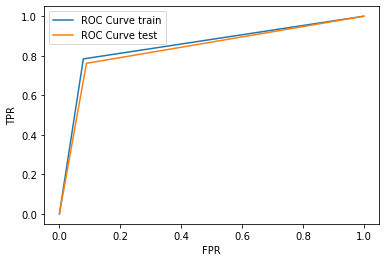

In [105]:
roc_curve_plot(cat,X_train,X_test,y_test,y_train)

### Grid Search Cv

In [ ]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [ ]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [ ]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>7 - Applying One Hot Encoder</font> <a class="anchor" id="seventh-bullet"></a>
    
</div>

### Separating X and Y

In [106]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

### One Hot Encoder

In [107]:
df_ohc = X.copy()
categorical=X.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(drop='first',sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
X=df_ohc.copy()
X.head()

,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,...,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.5,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.5,0.0,2.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.5,0.0,1.0


<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Gradient Boost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

### 8.1 - Data Splitting

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [109]:
gb = GradientBoostingClassifier() 
gb.fit(X_train,y_train)

GradientBoostingClassifier()

### Feature Selection

In [110]:
importances = gb.feature_importances_
indices = np.argsort(importances)

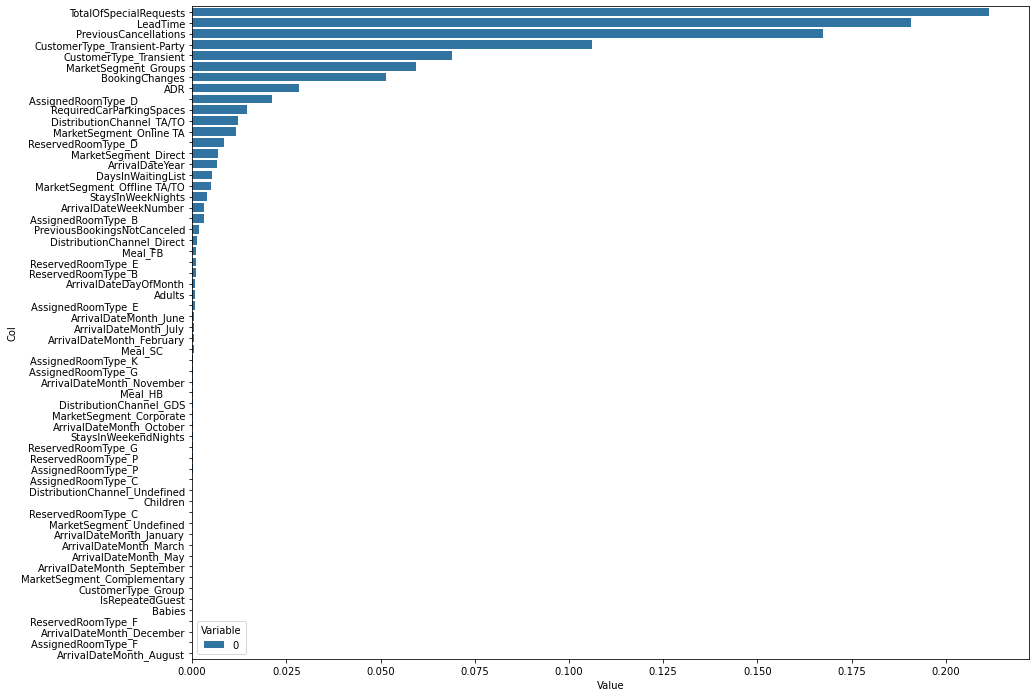

In [111]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,12))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [112]:
X_gb=X[zippy.sort_values(by=0,ascending=False).head(20)['col']]

###  Data Split after feature selection


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_gb, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [114]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=15,random_state=70,max_depth=5,min_samples_leaf=9) 
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features=15, min_samples_leaf=9,
                           random_state=70)

In [115]:
y_train_pred= gb.predict(X_train)
y_test_pred=gb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.86     35523
           1       0.86      0.72      0.78     26111

    accuracy                           0.83     61634
   macro avg       0.84      0.82      0.82     61634
weighted avg       0.84      0.83      0.83     61634

[[32539  2984]
 [ 7328 18783]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

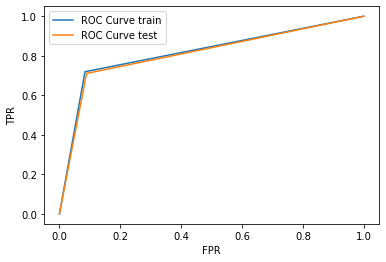

In [116]:
roc_curve_plot(gb,X_train,X_test,y_test,y_train)

### Cross-Validation

In [117]:
cv_results = cross_validate(gb, X_train,y_train, cv=5, scoring=["accuracy"])
gb_cross_train=cv_results["test_accuracy"].mean()
gb_cross_train

0.8271732966636968

In [119]:
gb_cross_std=cv_results["test_accuracy"].std()
gb_cross_std

0.0016828248649953248

In [121]:
gb_test = accuracy_score(y_test_pred,y_test)
gb_test

0.826010772924914

### Grid Search Cv

In [739]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [740]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [741]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>xGBoost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

In [123]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Feature Selection

In [124]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

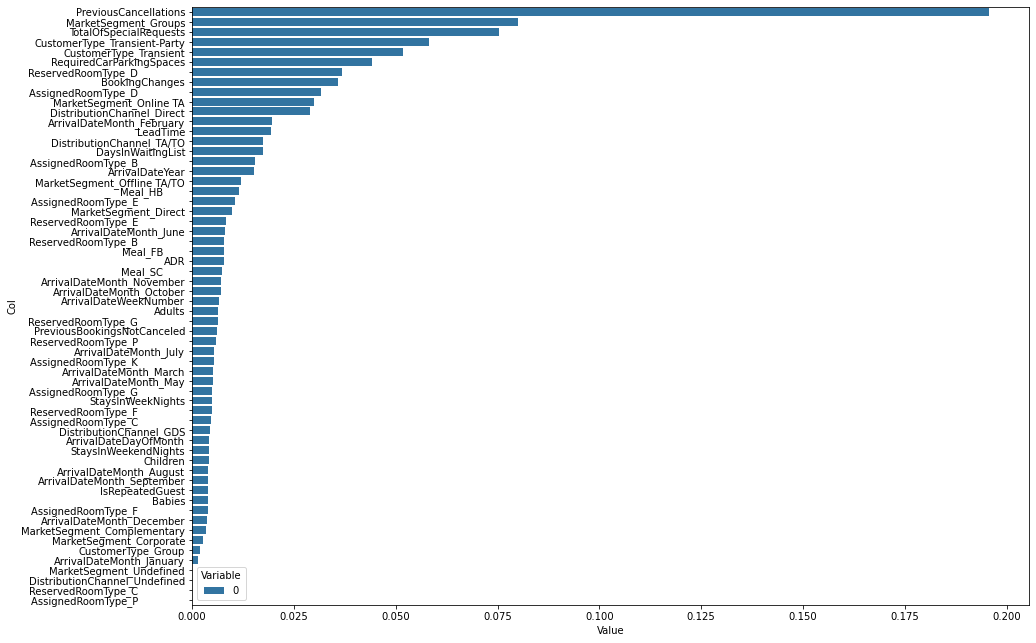

In [125]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,11))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [126]:
X_xgb=X[zippy.sort_values(by=0,ascending=False).head(32)['col']]

#### Data Split after Feature Selection

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y, train_size=0.8, random_state=42)

In [128]:
xgb = XGBClassifier(max_depth=5, min_samples_leaf=8)
xgb.fit(X_train,y_train)

[15:06:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [129]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     35531
           1       0.87      0.77      0.82     26103

    accuracy                           0.86     61634
   macro avg       0.86      0.84      0.85     61634
weighted avg       0.86      0.86      0.85     61634

[[32646  2885]
 [ 6041 20062]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [130]:
cv_results = cross_validate(xgb, X_train,y_train, cv=5, scoring=["accuracy"])
xgb_cross_train=cv_results["test_accuracy"].mean()
xgb_cross_train

[15:06:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are onl

0.8414348926313636

In [132]:
xgb_cross_std=cv_results["test_accuracy"].std()
xgb_cross_std

0.0018984822207833078

In [133]:
xgb_test = accuracy_score(y_test_pred,y_test)
xgb_test

0.8402232461548446

##### Grid Search

In [ ]:
max_depth_range=[5,6,7]
min_samples_leaf_range=[8,9,10,11]
max_features_range=[12,15,17]
n_estimators_range=[100,300,500]
random_state_range=[20,35,70]
param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
grid=GridSearchCV(estimator=xgb,param_grid=param_grid, cv =5)

In [ ]:
#grid.fit(X_train,y_train)
#grid.best_params_

In [ ]:
xgb = XGBClassifier(max_depth=7, min_samples_leaf=8)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

##### ROC curve

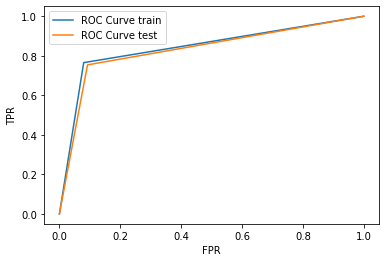

In [618]:
roc_curve_plot(xgb,X_train,X_test,y_test,y_train)

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Random Forest Classifier</font> <a class="anchor" id="tenth-bullet"></a>
    
</div>

### Data Splitting

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model 

In [135]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=100,max_features=16,random_state=100,n_jobs=-1,max_depth=16,min_samples_leaf=6)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features=16,
                       min_samples_leaf=6, n_jobs=-1, random_state=100)

### Feature Selection

In [136]:
importances = rf.feature_importances_
indices = np.argsort(importances)

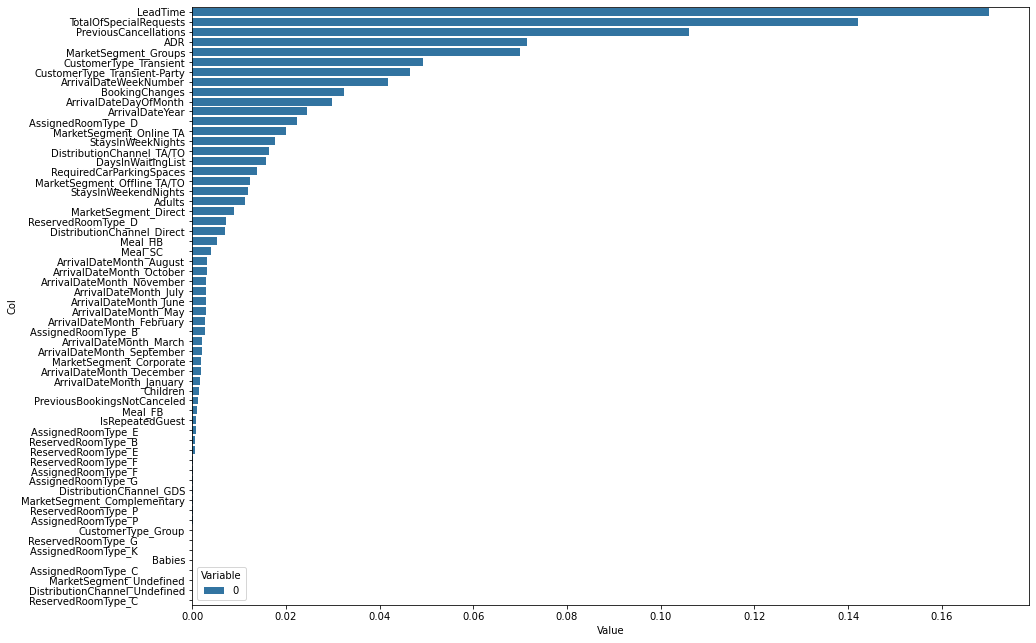

In [137]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,11))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [138]:
X_random=X[zippy.sort_values(by=0,ascending=False).head(35)['col']]

### Data Split after feature selection

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_random, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    stratify=y)

In [ ]:
#criterion="entropy",n_estimators=100,max_features=15,random_state=10,n_jobs=-1,max_depth=16,min_samples_leaf=4

In [216]:
rf = RandomForestClassifier(criterion="entropy",max_depth=18,min_samples_leaf=1,n_jobs=-1)           
                
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, n_jobs=-1)

In [217]:
y_train_pred= rf.predict(X_train)
y_test_pred=rf.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     35523
           1       0.90      0.80      0.85     26111

    accuracy                           0.88     61634
   macro avg       0.88      0.87      0.87     61634
weighted avg       0.88      0.88      0.88     61634

[[33270  2253]
 [ 5224 20887]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [218]:
cv_results = cross_validate(rf, X_train,y_train, cv=5, scoring=["accuracy"])
rf_cross_train=cv_results["test_accuracy"].mean()
rf_cross_train

0.8504071728349103

In [220]:
rf_cross_std=cv_results["test_accuracy"].std()
rf_cross_std

0.004014441751493053

In [221]:
rf_test = accuracy_score(y_test_pred,y_test)
rf_test

0.8478162113050814

##### ROC curve

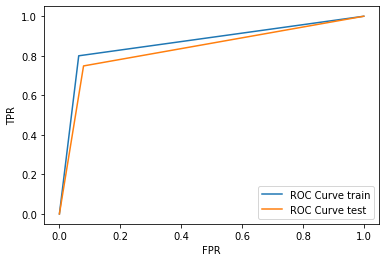

In [222]:
roc_curve_plot(rf,X_train,X_test,y_test,y_train)

### Grid Search Cv

In [ ]:
#max_depth_range=[12,13,15]
#min_samples_leaf_range=[3,7,8,9]
#max_features_range=[15,16,21,22]
#n_estimators_range=[100,500,1000]
#random_state_range=[70,100,120,200]

In [ ]:
#param_grid=dict(max_features=max_features_range)
#grid=GridSearchCV(estimator=rf,param_grid=param_grid, cv =5)

In [ ]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Decision Tree</font> <a class="anchor" id="twelveth-bullet"></a>
    
</div>

### Data Splitting

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

###  Model

In [224]:
dt = DecisionTreeClassifier() 
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Feature Selection

In [225]:
importances = dt.feature_importances_
indices = np.argsort(importances)

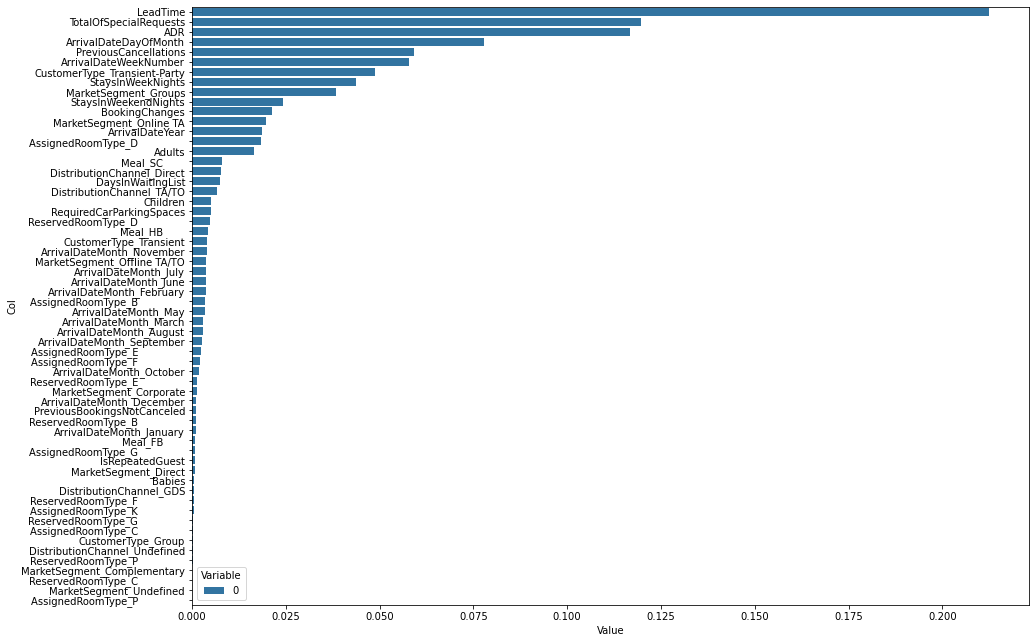

In [226]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,11))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [227]:
X_dt=X[zippy.sort_values(by=0,ascending=False).head(12)['col']]

###  Data Split after feature selection

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [267]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=12,min_samples_leaf=1,random_state=70) 
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=70)

In [268]:
y_train_pred= dt.predict(X_train)
y_test_pred=dt.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     35523
           1       0.83      0.73      0.78     26111

    accuracy                           0.82     61634
   macro avg       0.83      0.81      0.82     61634
weighted avg       0.82      0.82      0.82     61634

[[31683  3840]
 [ 7059 19052]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Cross-Validation

In [269]:
cv_results = cross_validate(dt, X_train,y_train, cv=5, scoring=["accuracy"])
dt_cross_train=cv_results["test_accuracy"].mean()
dt_cross_train

0.8054807604255718

In [270]:
dt_cross_std=cv_results["test_accuracy"].std()
dt_cross_std

0.003507112909499601

In [271]:
dt_test = accuracy_score(y_test_pred,y_test)
dt_test

0.8051138944772536

##### ROC curve

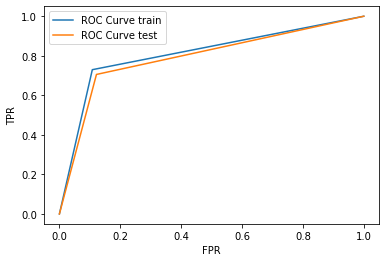

In [272]:
roc_curve_plot(dt,X_train,X_test,y_test,y_train)

### Grid Search Cv

In [308]:
criterion_range=["gini","entropy"] 
max_depth_range=[17,18,19,20]
min_samples_split_range=[1,2,3,4]
min_samples_leaf_range=[4,6,8,10,12,14,16,18,20]
random_state_range=[20,35,70]

In [309]:
param_grid=dict(min_samples_leaf=min_samples_leaf_range)
grid=GridSearchCV(estimator=dt,param_grid=param_grid, cv =5)

In [378]:
#grid.fit(X_train,y_train)
#grid.best_params_

## Visualization

In [273]:
data={"Cross Validation Train Accuracy":[cat_cross_train,gb_cross_train,xgb_cross_train,rf_cross_train,dt_cross_train],
      "Cross Validation Train STD":[cat_cross_std,gb_cross_std,xgb_cross_std,rf_cross_std,dt_cross_std],
      "Test Accuracy" : [cat_test,gb_test,xgb_test,rf_test,dt_test]}

In [274]:
conclusion=pd.DataFrame(data=data,index=["CatBoost","GradientBoost","Extreme Gradient Boost","Random Forest","Decision Tree"])
conclusion

,Cross Validation Train Accuracy,Cross Validation Train STD,Test Accuracy
CatBoost,0.844956,0.002987,0.847881
GradientBoost,0.827173,0.001683,0.826011
Extreme Gradient Boost,0.841435,0.001898,0.840223
Random Forest,0.850407,0.004014,0.847816
Decision Tree,0.805481,0.003507,0.805114
